In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("salaries_clean.csv", encoding="latin-1")

## About Data

In [3]:
df.head()

,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary_id                  1655 non-null   int64  
 1   employer_name              1651 non-null   object 
 2   location_name              1655 non-null   object 
 3   location_state             558 non-null    object 
 4   location_country           792 non-null    object 
 5   location_latitude          792 non-null    float64
 6   location_longitude         792 non-null    float64
 7   job_title                  1655 non-null   object 
 8   job_title_category         1655 non-null   object 
 9   job_title_rank             425 non-null    object 
 10  total_experience_years     1608 non-null   float64
 11  employer_experience_years  1608 non-null   float64
 12  annual_base_pay            1651 non-null   float64
 13  signing_bonus              1332 non-null   float

In [5]:
df.isna().sum()

salary_id                       0
employer_name                   4
location_name                   0
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title                       0
job_title_category              0
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             409
comments                     1363
submitted_at                    0
dtype: int64

In [6]:
len(df)

1655

In [7]:
print("Empty Values : %", round(df.isnull().sum().sum() / (len(df)*len(df.columns))*100,))

Empty Values : % 25


In [8]:
df.describe()

,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1655.000000,792.000000,792.000000,1608.000000,1608.000000,1.651000e+03,1.332000e+03,1.336000e+03
mean,1684.100906,37.754394,-64.712273,6.756113,2.656163,6.325004e+06,2.240563e+04,1.177552e+04
std,932.901390,16.740905,67.090364,5.687004,3.301834,2.461353e+08,3.097990e+05,6.921569e+04
min,1.000000,-41.000000,-123.270000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,897.000000,37.410000,-102.702500,3.000000,1.000000,6.100000e+04,0.000000e+00,0.000000e+00
50%,1711.000000,38.580000,-95.000000,5.000000,2.000000,9.948000e+04,0.000000e+00,5.000000e+02
75%,2477.000000,45.440000,-64.562500,10.000000,3.000000,1.300000e+05,5.000000e+03,1.000000e+04
max,3298.000000,65.000000,174.000000,56.000000,58.000000,1.000000e+10,8.999999e+06,2.000000e+06


<Axes: >

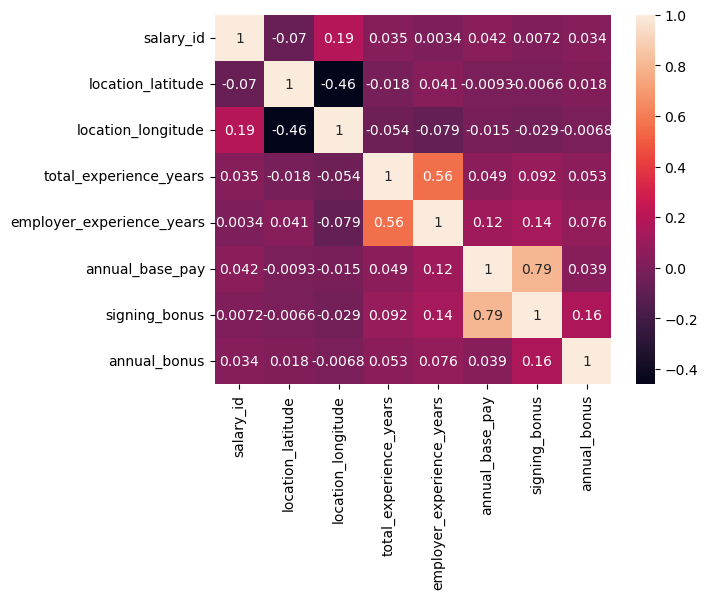

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Clean the Data

In [10]:
df = df.drop(['salary_id','location_name', 'location_state',
       'location_country', 'location_latitude', 'location_longitude',
        'job_title_rank','comments','submitted_at','stock_value_bonus'],axis=1)

In [11]:
df.head()

,employer_name,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,opower,systems engineer,Engineering,13.0,2.0,125000.0,5000.0,0.0
1,walmart,senior developer,Software,15.0,8.0,65000.0,NaN,5000.0
2,vertical knowledge,software engineer,Software,4.0,1.0,86000.0,5000.0,6000.0
3,netapp,mts,Other,4.0,0.0,105000.0,5000.0,8500.0
4,apple,software engineer,Software,4.0,3.0,110000.0,5000.0,7000.0


In [12]:
df.isna().sum()

employer_name                  4
job_title                      0
job_title_category             0
total_experience_years        47
employer_experience_years     47
annual_base_pay                4
signing_bonus                323
annual_bonus                 319
dtype: int64

In [13]:
df = df.dropna(subset=["employer_name", "annual_base_pay"])

In [14]:
len(df)

1647

In [15]:
df.isna().sum()

employer_name                  0
job_title                      0
job_title_category             0
total_experience_years        44
employer_experience_years     44
annual_base_pay                0
signing_bonus                318
annual_bonus                 314
dtype: int64

In [16]:
df[["signing_bonus","annual_bonus"]] = df[["signing_bonus","annual_bonus"]].fillna(0)

In [17]:
df[["total_experience_years","employer_experience_years"]]= df[["total_experience_years","employer_experience_years"]].fillna(round(df[["total_experience_years","employer_experience_years"]].mean(),))

In [18]:
df.isna().sum()

employer_name                0
job_title                    0
job_title_category           0
total_experience_years       0
employer_experience_years    0
annual_base_pay              0
signing_bonus                0
annual_bonus                 0
dtype: int64

In [19]:
pd.set_option("display.float_format",lambda x:"%0.f"% x)

In [20]:
df["annual_base_pay"].sort_values()

1361            0
1143            0
382             0
18             24
306            28
          ...    
221       9250000
1088     10280000
1639     50000000
1135    156000000
1645   9999999999
Name: annual_base_pay, Length: 1647, dtype: float64

## Scatter Plots

In [21]:
df.columns

Index(['employer_name', 'job_title', 'job_title_category',
       'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus'],
      dtype='object')

In [22]:
df.rename(columns={
    'employer_name':'company',
    'job_title':'title',
    'job_title_category':'category',
    'total_experience_years':'total_exp',
    'employer_experience_years':'local_exp',
    'annual_base_pay':'salary'
}, inplace=True)

In [23]:
df.tail(5)

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1650,sparkfun electronics,junior software developer,Software,1,0,60500,0,800
1651,intel,staff software enginer,Software,6,4,164000,0,20000
1652,$2bn valuation tech company,sr. frontend eng,Web,7,1,150000,0,0
1653,of maryland,scientific programmer (faculty research assist...,Applied Science,5,1,75000,0,0
1654,linkedin,business analytics intern,Other,2,0,50,0,0


<Axes: xlabel='total_exp', ylabel='local_exp'>

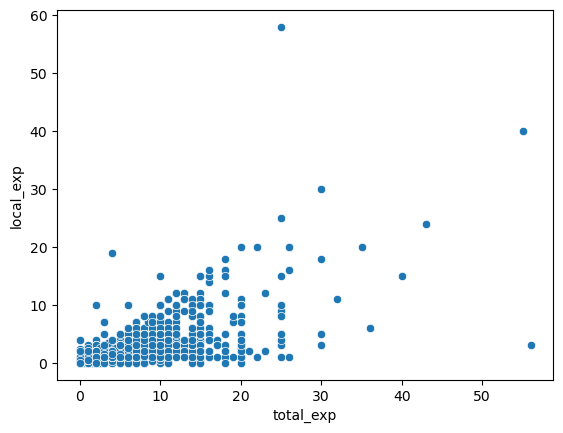

In [24]:
sns.scatterplot(data=df, x="total_exp", y="local_exp")

In [25]:
df["local_exp"].idxmax()

1596

In [26]:
df.loc[1596:1596]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1596,tom,tom,Other,25,58,250000,250478,150000


In [27]:
df[df["local_exp"] > df["total_exp"]].iloc[8:12]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
339,airbnb,software engineer,Software,0,1,110000,50000,0
347,microsoft,software engineer,Software,1,2,120000,200000,0
447,johns hopkins,phd student,Other,2,4,24000,0,0
605,la michoacana,servidor de aguas,Other,3,7,48000,0,0


In [28]:
df = df[(df["local_exp"]-1 ) < df["total_exp"]]

<Axes: xlabel='total_exp', ylabel='local_exp'>

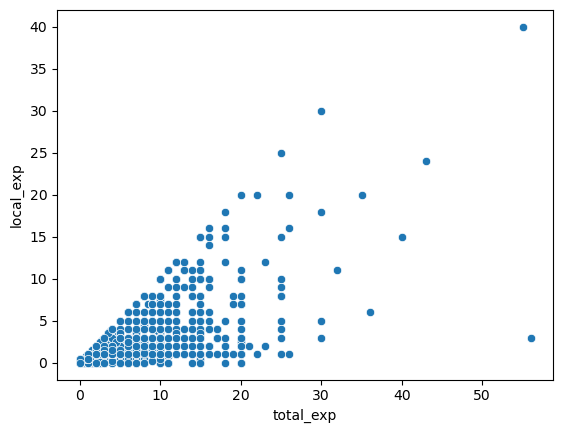

In [29]:
sns.scatterplot(data=df, x="total_exp", y="local_exp")

In [30]:
df[df["total_exp"]>30]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
34,city of austin,it programmer,Other,40,15,103000,0,1500
239,dukker,professional hoe,Other,55,40,120,120,12
335,gg,pres,Other,35,20,75000,2000,3000
970,ibm,advisory software engineer,Software,32,11,111000,0,1200
1422,ghgh,ghghgh,Other,56,3,565656,5656,566
1550,hewlett packard enterprise,software engineer vii,Software,36,6,206000,0,15000
1555,ãÜ___¡,asdf,Other,43,24,23423,234,2


In [31]:
df = df.set_index(np.arange(0,len(df)))

In [32]:
df[df["total_exp"]>30]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
34,city of austin,it programmer,Other,40,15,103000,0,1500
233,dukker,professional hoe,Other,55,40,120,120,12
328,gg,pres,Other,35,20,75000,2000,3000
941,ibm,advisory software engineer,Software,32,11,111000,0,1200
1382,ghgh,ghghgh,Other,56,3,565656,5656,566
1507,hewlett packard enterprise,software engineer vii,Software,36,6,206000,0,15000
1512,ãÜ___¡,asdf,Other,43,24,23423,234,2


In [33]:
df.drop(df.index[[1382,1512]],inplace=True)

In [34]:
df.iloc[[1382,1512]]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1383,ali,pagla dancer,Other,9,5,550000,20000,200000
1514,laika,systems administrator,Management,7,0,77000,0,2000


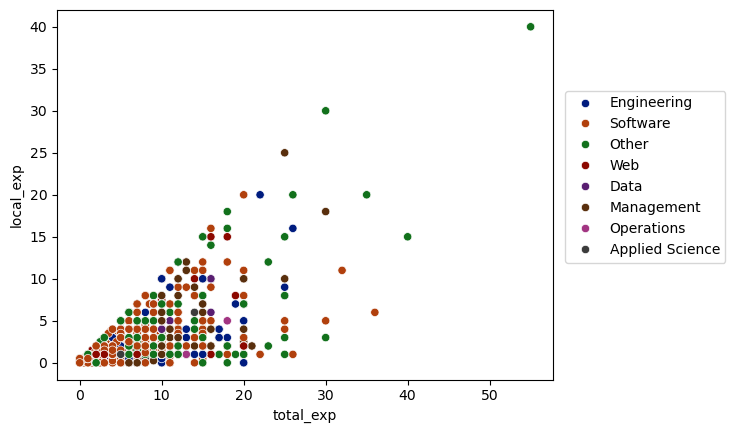

In [35]:
sns.scatterplot(data=df, x="total_exp", y="local_exp",hue="category", palette="dark")
plt.legend(bbox_to_anchor=(1.01,0.8))

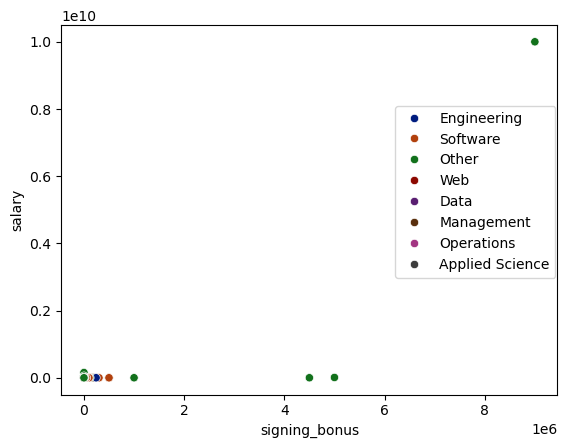

In [36]:
sns.scatterplot(data=df,x="signing_bonus",y="salary",
                hue="category",palette="dark")
plt.legend(bbox_to_anchor=(1.01,0.8))

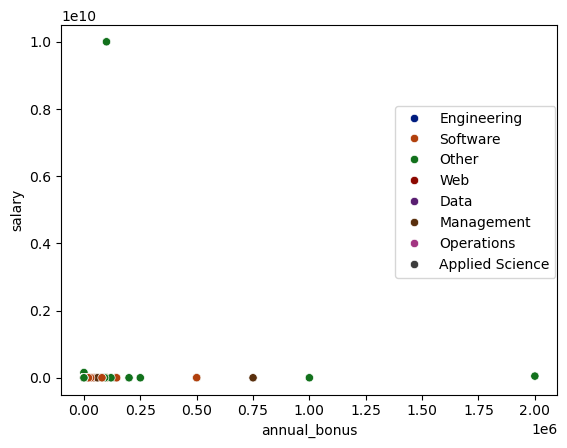

In [37]:
sns.scatterplot(data=df,x="annual_bonus",y="salary",
                hue="category",palette="dark")
plt.legend(bbox_to_anchor=(1.01,0.8))

In [38]:
len(df[df["salary"] > 500_000])/len(df) # 2% making higher than 500k

0.021170610211706103

## Countplot

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Engineering'),
  Text(1, 0, 'Software'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Web'),
  Text(4, 0, 'Data'),
  Text(5, 0, 'Management'),
  Text(6, 0, 'Operations'),
  Text(7, 0, 'Applied Science')])

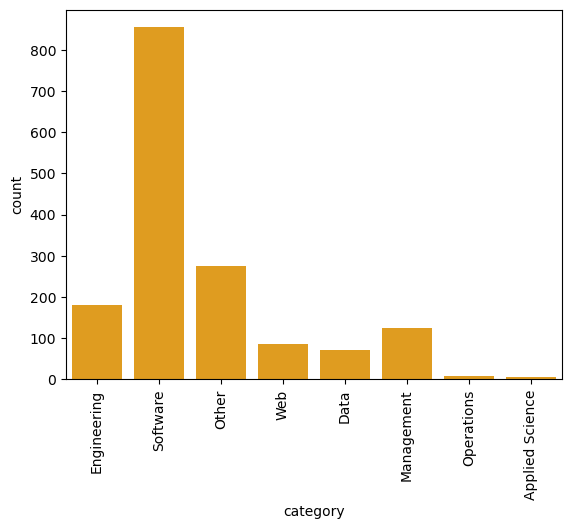

In [39]:
sns.countplot(data=df, x="category",color="orange")
plt.xticks(rotation=90)

In [40]:
df.value_counts("category")

category
Software           855
Other              275
Engineering        180
Management         124
Web                 87
Data                71
Operations           8
Applied Science      6
Name: count, dtype: int64

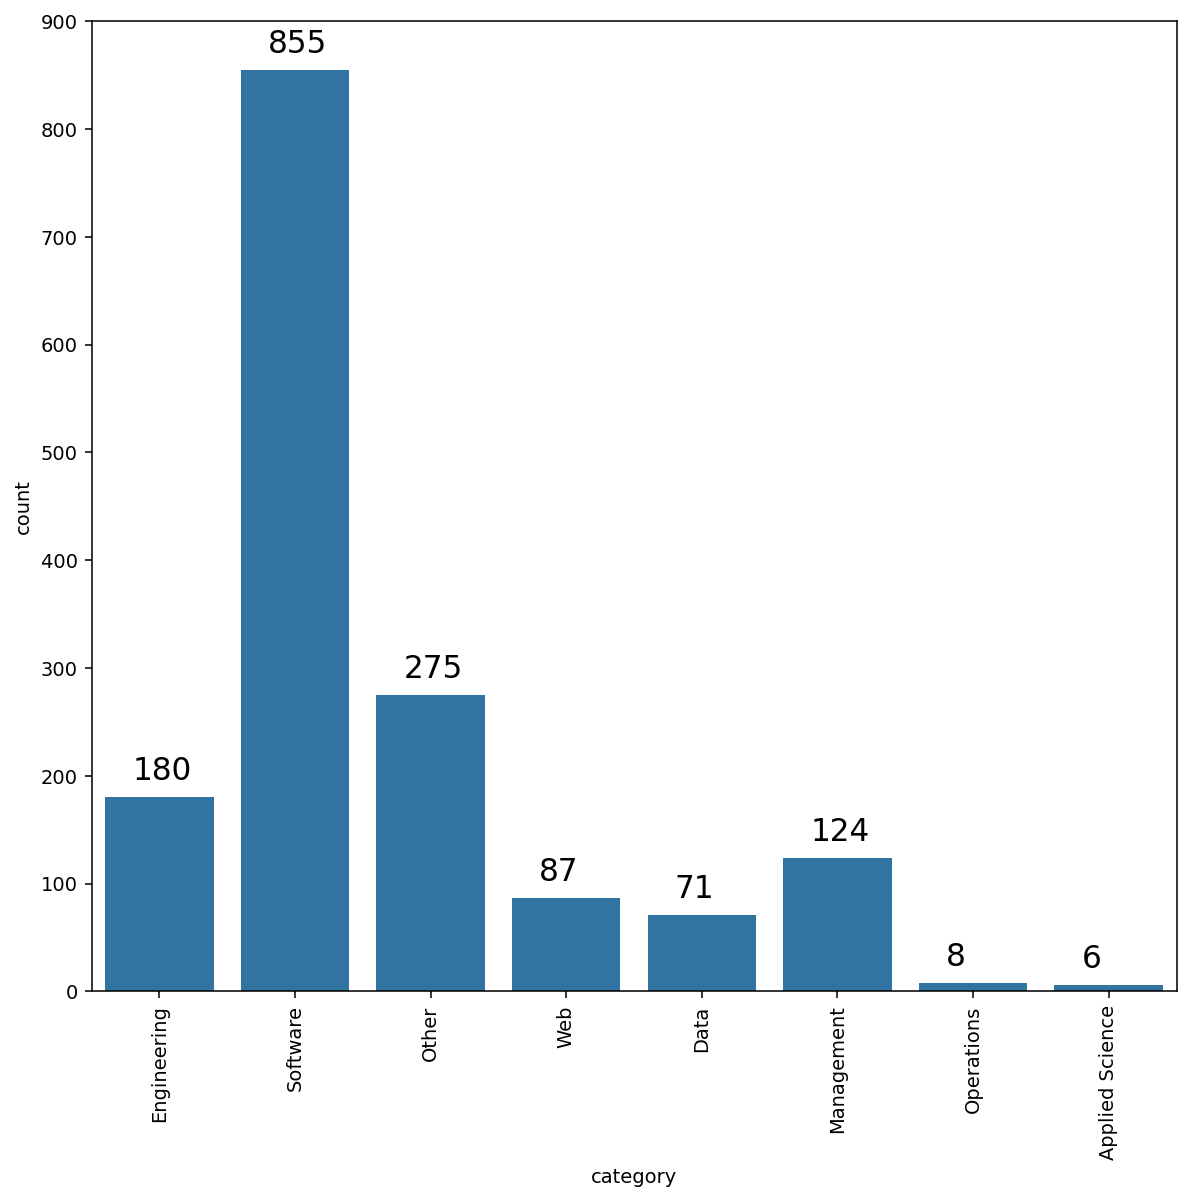

In [41]:
plt.figure(figsize=(10,9),dpi=140)
ax = sns.countplot(data=df, x="category")
for p in ax.patches:
     ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+16), size=16)

plt.xticks(rotation=90)
plt.ylim(0,900);

## KDE plot

<Axes: xlabel='local_exp', ylabel='Density'>

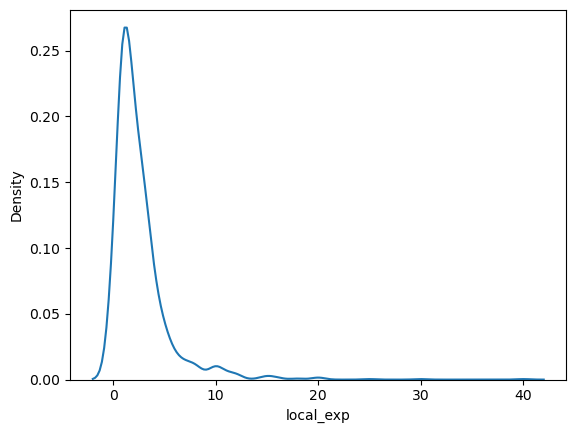

In [42]:
sns.kdeplot(data=df,x="local_exp")

<Axes: xlabel='local_exp', ylabel='Density'>

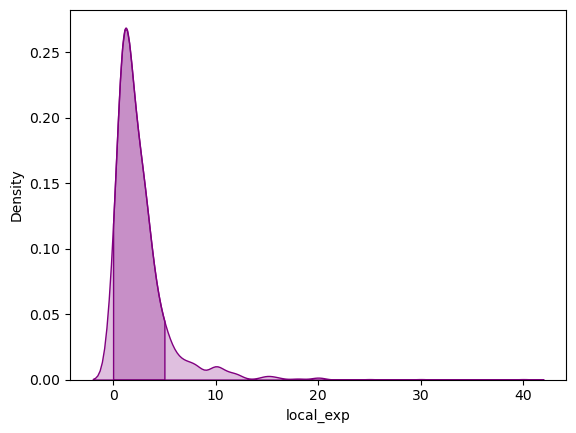

In [43]:
sns.kdeplot(data=df , x="local_exp",clip=[0,5],fill=True,color="purple")
sns.kdeplot(data=df , x="local_exp",fill=True,color="purple")

## Box & Violin plots

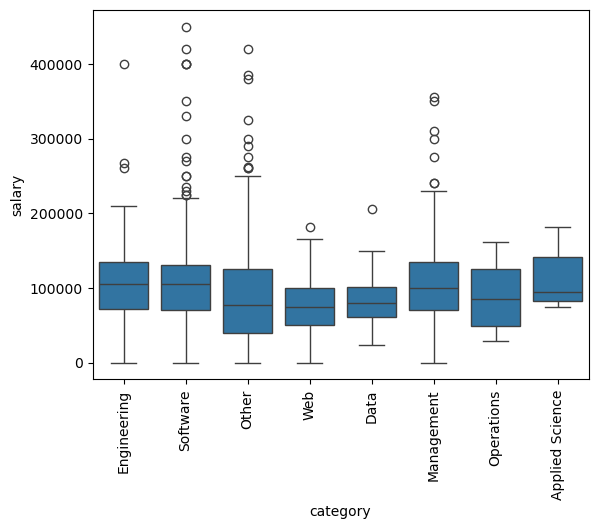

In [44]:
sns.boxplot(data=df[df["salary"]<500_000], x="category", y="salary")
plt.xticks(rotation=90);

C:\Users\Ozan\AppData\Local\Temp\ipykernel_18776\3651826007.py:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=df[df["salary"]<500_000], x="category", y="salary", bw=0.3)


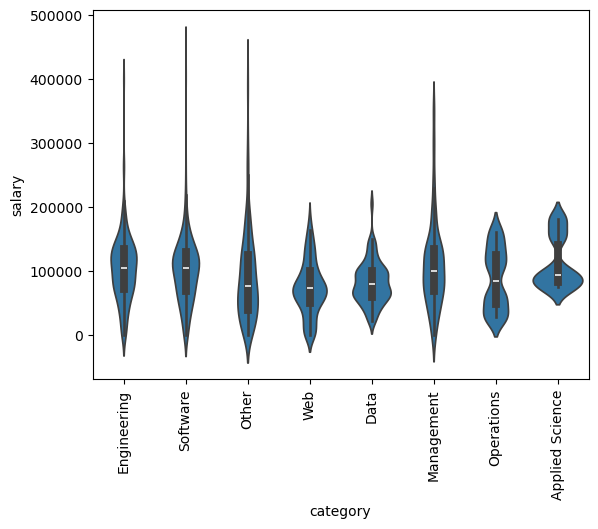

In [45]:
sns.violinplot(data=df[df["salary"]<500_000], x="category", y="salary", bw=0.3)
plt.xticks(rotation=90);